<a href="https://colab.research.google.com/github/Sgarciah555/MPM_200_GarciaHernandez./blob/main/MPM200_Session8_HW_SGarciaHernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [38]:
install.packages("beepr")
install.packages("tidyverse")
install.packages("sjPlot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
library(beepr)
library(tidyverse)
library(sjPlot)


In [40]:
beep("mario")


Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [41]:
data  = read.csv("/content/Hummingbird_data (2).csv", stringsAsFactors = FALSE)

In [42]:
list.files("/content")

[1] "Hummingbird_data (2).csv"                      
[2] "Hummingbird_data_STEPHANIEGARCIAHERNANDEZ.xlsx"
[3] "sample_data"

In [43]:
colnames(data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

In [44]:
list.files("/content")


[1] "Hummingbird_data (2).csv"                      
[2] "Hummingbird_data_STEPHANIEGARCIAHERNANDEZ.xlsx"
[3] "sample_data"

In [45]:
# Dimensions of the data
nrow(data)
ncol(data)


[1] 6908

[1] 12

**Q2. How many rows and columns are in the datafame**  
1 point

rows: 6908 columns: 12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [46]:
str(data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [47]:
# Identify data types of each column
data_types = sapply(data, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [48]:
library(dplyr)
model_data = sample_n(data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

rows: 5000 columns:12

In [49]:
nrow(model_data)
ncol(model_data)


[1] 5000

[1] 12

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

categorical: 11
continuous: 1

In [50]:
# Check data types
data_types = sapply(data, class)

# Categorical = character or factor
categorical_vars = names(data_types[data_types %in% c("character", "factor")])


# Continuous = numeric or integer
continuous_vars = names(data_types[data_types %in% c("numeric", "integer")])

# Print results
categorical_vars
continuous_vars

length(categorical_vars)
length(continuous_vars)


[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "season"             "r"                 
[10] "Green_Orange"       "ID"

[1] "Brought_in_after"

[1] 11

[1] 1

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [51]:
write.csv(model_data, "/Hummingbird_data_StephanieGarciaHernandez.csv", row.names = FALSE)

In [52]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [53]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4141
Santa Barbara,77
malibu,782


In [54]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [55]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

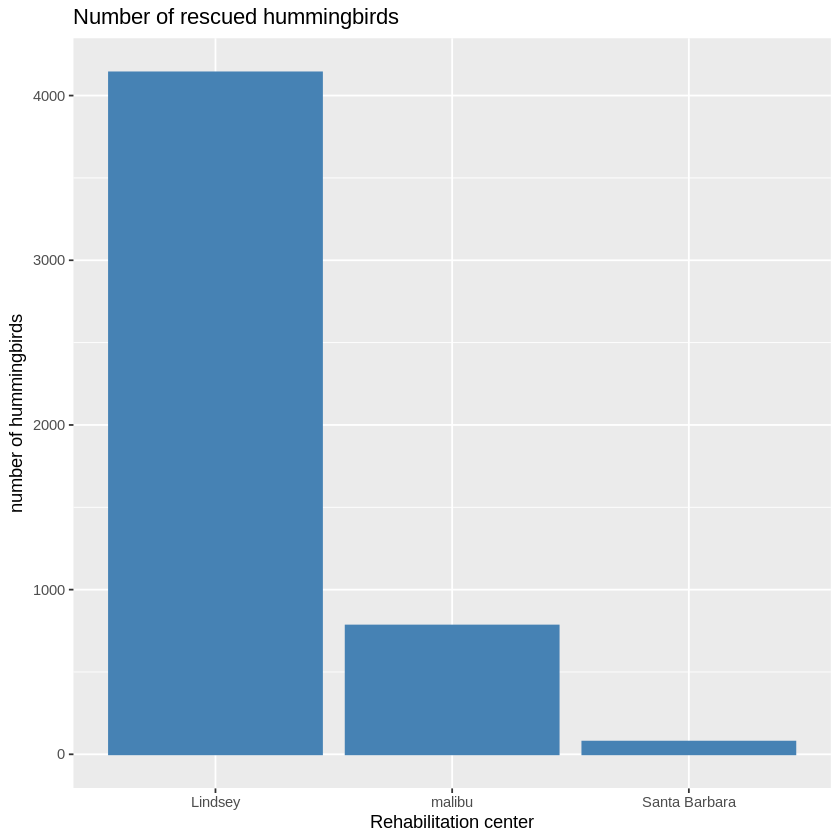

In [56]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [57]:
ggsave(
  filename = "/rehab_hummingbirds_plot.pdf",
  plot = p,
  width = 4,
  height = 3,
  units = "in"
)

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

* model_data %>% : passes the dataset to the next command.
* group_by(Place): groups the data by rehabilitation center.
* summarise(count = n_distinct(ID)) : calculates how many unique birds (IDs) were admitted to each center.
* The object p : stores the plot, which I then saved to PDF.
* ggplot(rehab, aes(x = Place, y = count)) + : starts a plot using the summary table.
* geom_bar(stat="identity") draws bars whose heights equal the actual counts.
* xlab() and ylab() label the axes.
* labs(title = "Number of rescued hummingbirds"): adds a title to the plot.
* ggsave(...): saves the plot into a file.
* filename sets the PDF name.
* plot = p: tells R which plot to save.
* width and height: define the plot size in inches.


# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

* Across the five covariates (Age_e, Sex_e, Place, F_Aid, and season), several clear patterns emerge:

Age_e: Adult-like birds have extremely high mortality compared with nestlings.
This shows a strong association between age and outcome.

Sex_e: Sex also shows noticeable differences. “Female-like” birds have much higher mortality in absolute numbers.
Males and unknown-sex birds show different death vs. release patterns as well. However, interpretation is limited because “Female-like” represents the majority of the dataset. The imbalance makes it unclear whether sex truly affects survival or whether it reflects skewed sampling.

Place: Rehabilitation centers show clear survival differences. Lindsey has far more birds and far more deaths than other centers. This suggests the outcome is strongly associated with location, likely due to differences in caseload, injury severity, or facility capacity.

First Aid: Birds that received first aid appear more likely to be released.This indicates a meaningful association between early intervention and survival.

Season: Season shows strong patterns. Spring and summer have far more admissions and higher mortality than fall or winter. This suggests seasonality affects survival, likely via environmental stressors.

* Are they associated with final disposition?

Strong associations: Age_e, Place, F_Aid, Season
Likely association but limited by sample imbalance: Sex_e

So yes, several covariates appear associated, but not all with equal strength.

* Recommended statistical tests

To evaluate the associations formally:
Chi-square tests for categorical predictors with adequate cell counts

Univariate logistic regression to quantify the effect of each covariate

Multivariable logistic regression to control for confounding between predictors

These tests would confirm whether the visual differences are statistically significant.


In [58]:
df = model_data  %>%
group_by(Age_e, Disposition_binary)%>%
summarise(count = n_distinct(Age_e, Disposition_binary))

`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


In [59]:
df

Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,1
Nestling,Released,1
adult-like,Died,1
adult-like,Released,1


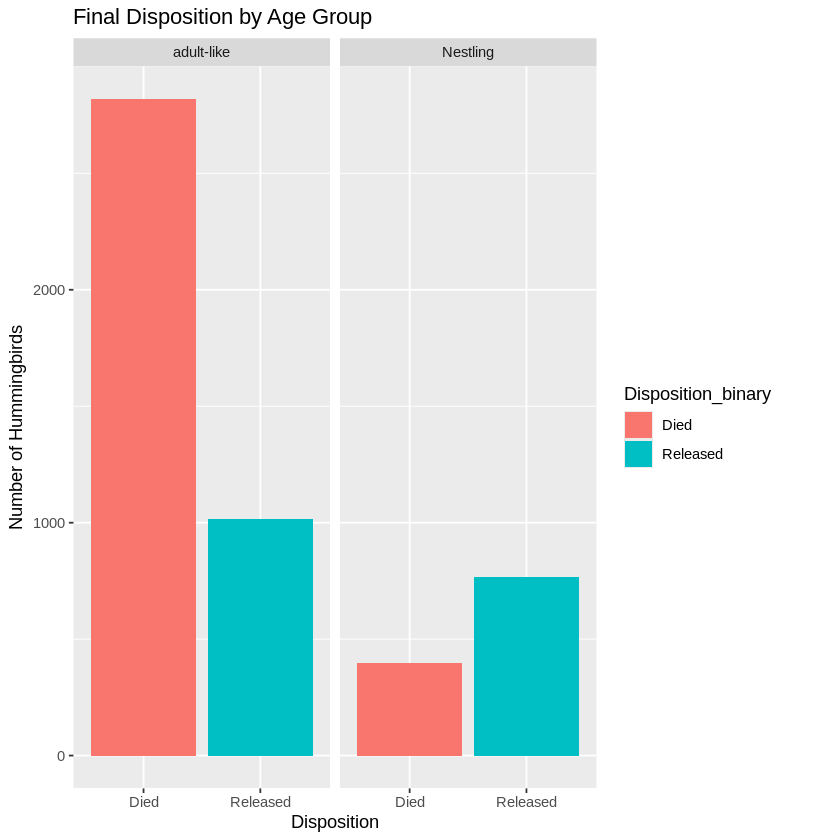

In [60]:
df_age = model_data %>%
  group_by(Age_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_age, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ Age_e) +
  labs(title = "Final Disposition by Age Group",
       x = "Disposition",
       y = "Number of Hummingbirds")



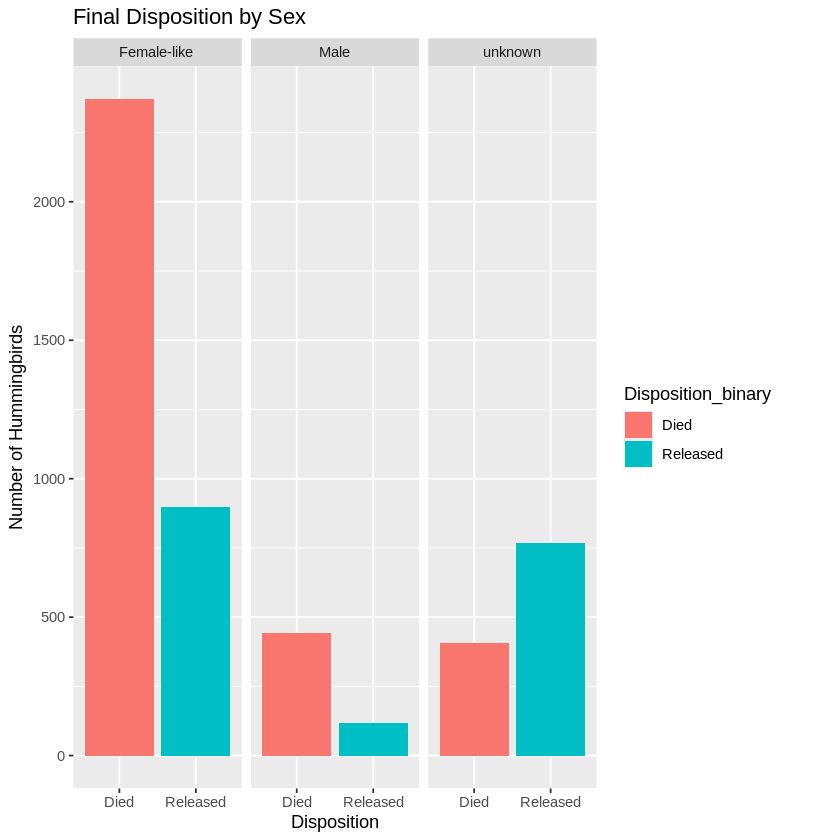

In [61]:
df_sex = model_data %>%
  group_by(Sex_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_sex, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ Sex_e) +
  labs(title = "Final Disposition by Sex",
       x = "Disposition",
       y = "Number of Hummingbirds")



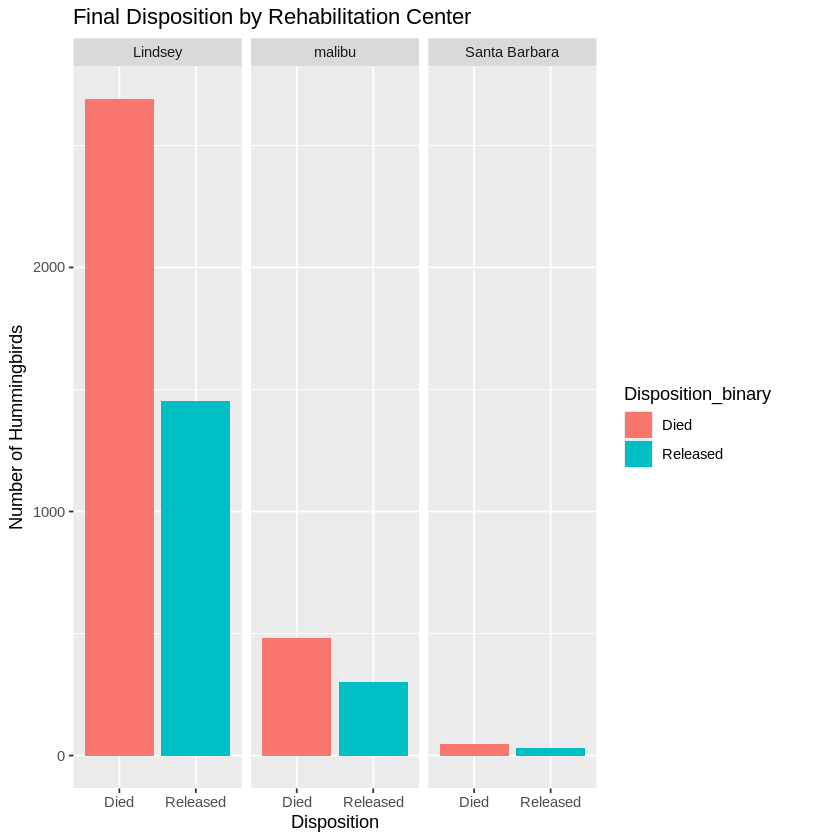

In [62]:
df_place = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_place, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ Place) +
  labs(title = "Final Disposition by Rehabilitation Center",
       x = "Disposition",
       y = "Number of Hummingbirds")


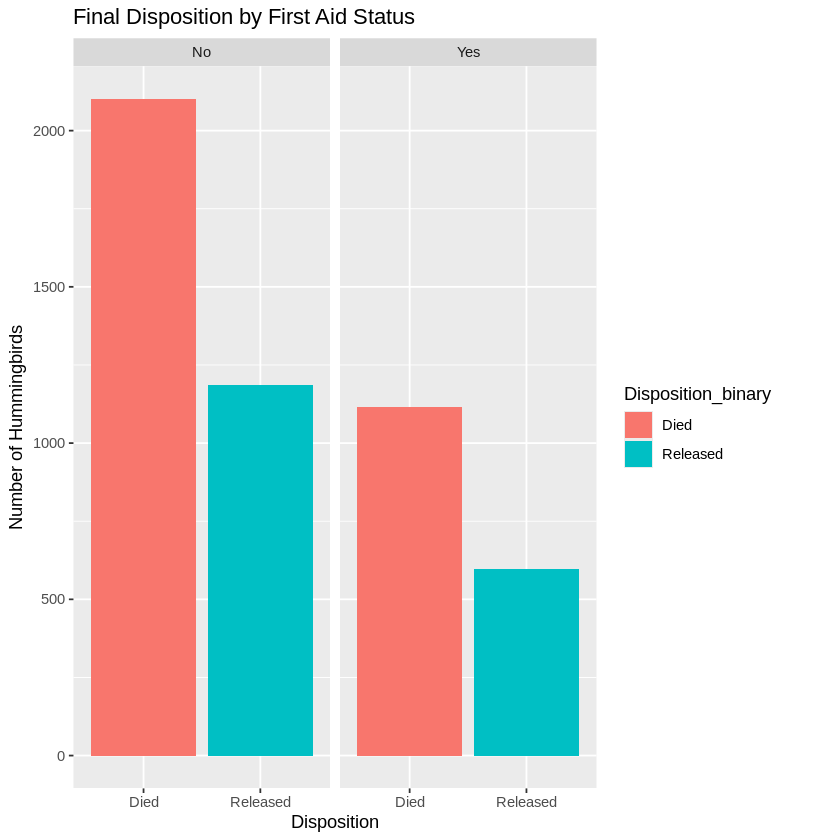

In [63]:
df_faid = model_data %>%
  group_by(F_Aid, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_faid, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ F_Aid) +
  labs(title = "Final Disposition by First Aid Status",
       x = "Disposition",
       y = "Number of Hummingbirds")


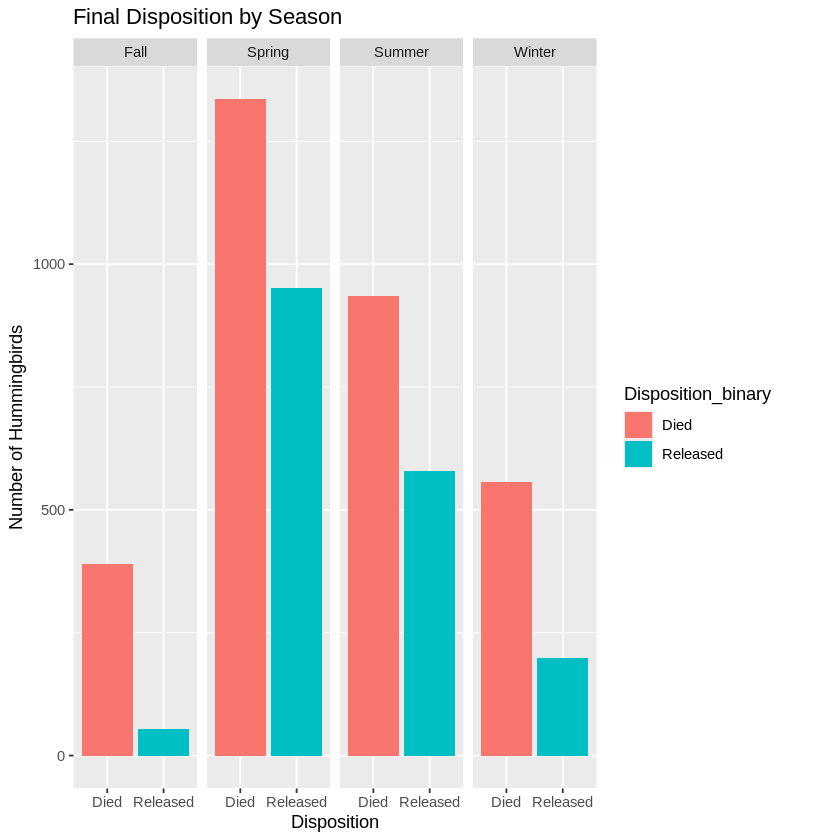

In [64]:
df_season = model_data %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_season, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ season) +
  labs(title = "Final Disposition by Season",
       x = "Disposition",
       y = "Number of Hummingbirds")


## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

The table shows the proportion of hummingbirds that were released versus died for each rehabilitation center. Some centers have noticeably higher release proportions, while others show a larger proportion of deaths. This suggests differences in caseload, resources, or bird condition upon admission. The bar chart makes these center-specific differences visually clear.


Place,Disposition_binary,count,proportion
<chr>,<chr>,<int>,<dbl>
Lindsey,Died,2690,0.6496015
Lindsey,Released,1451,0.3503985
Santa Barbara,Died,46,0.5974026
Santa Barbara,Released,31,0.4025974
malibu,Died,481,0.6150895
malibu,Released,301,0.3849105


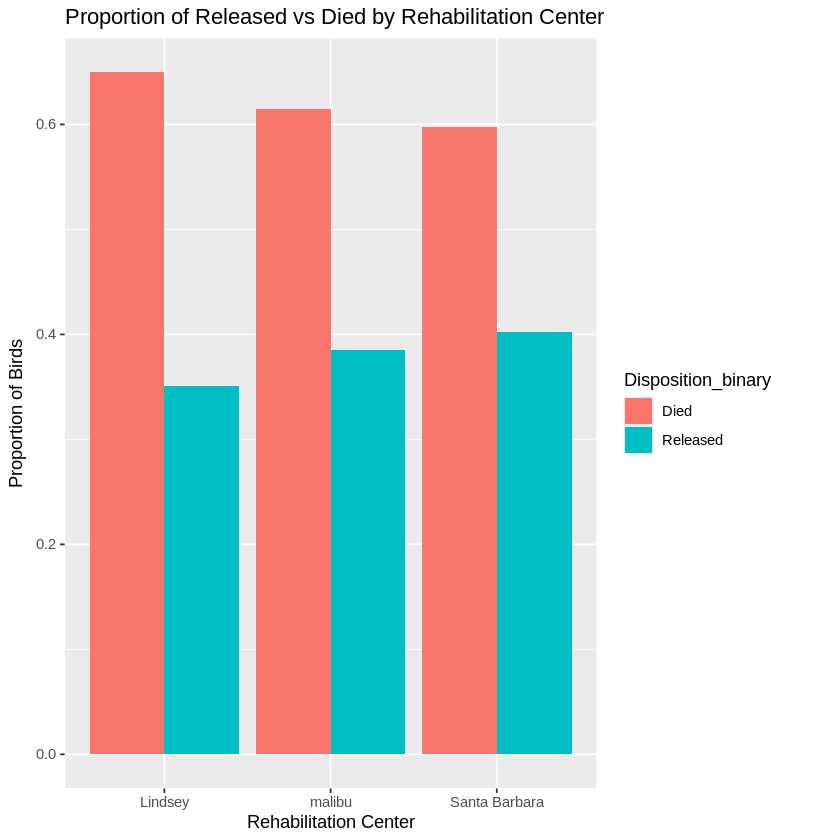

In [65]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop") %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))
proportions


# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary )) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion of Birds") +
  labs(title = "Proportion of Released vs Died by Rehabilitation Center" )

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

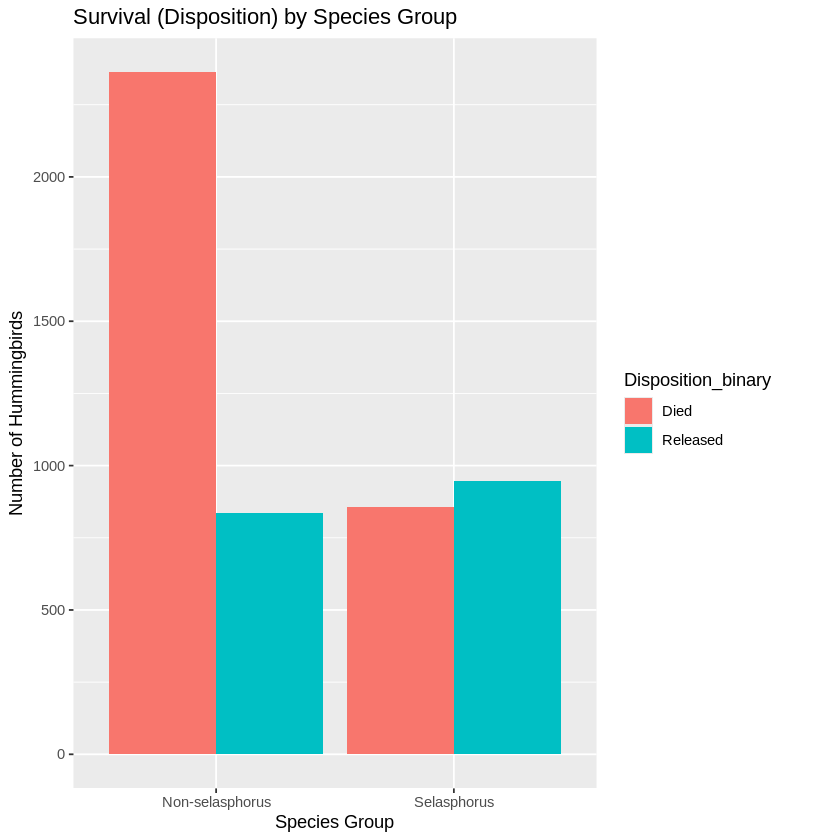

In [66]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e %in% c("ANHU", "BCHU", "NonSselasphorus"),
       "Non-selasphorus",
       "Selasphorus")


# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(species_distribution,
       aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title = "Survival (Disposition) by Species Group" )

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [67]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")


Q12a Please explain the argument `format` in code above

format = "%m/%d/%Y" tells R how to read the dates in that column.

format symbols mean:
%m -> month (01–12)
%d -> day (01–31)
%Y -> full year (1991, 2008, etc.)
The slashes / in the format must match the slashes in the data

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [68]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))
admissions_by_month

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))
admissions_by_year


Admitted_month,count
<chr>,<int>
1991-01,13
1991-02,4
1991-03,21
1991-04,30
1991-05,17
1991-06,19
1991-07,12
1991-08,9
1991-09,7


Admitted_year,count
<chr>,<int>
1991,138
1992,123
1993,132
1994,127
1995,146
1996,149
1997,128
1998,146
1999,148


Finally, we can use `ggplot` to plot these timelines.

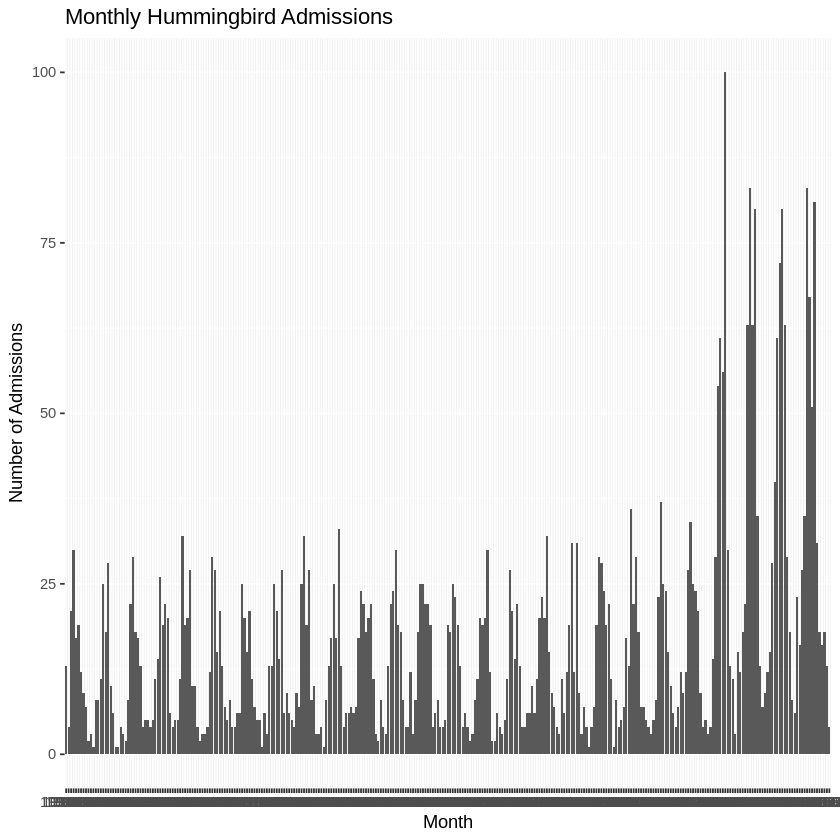

In [69]:
# Plot admissions by month
ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Month") +
  ylab("Number of Admissions") +
  labs(title = "Monthly Hummingbird Admissions")


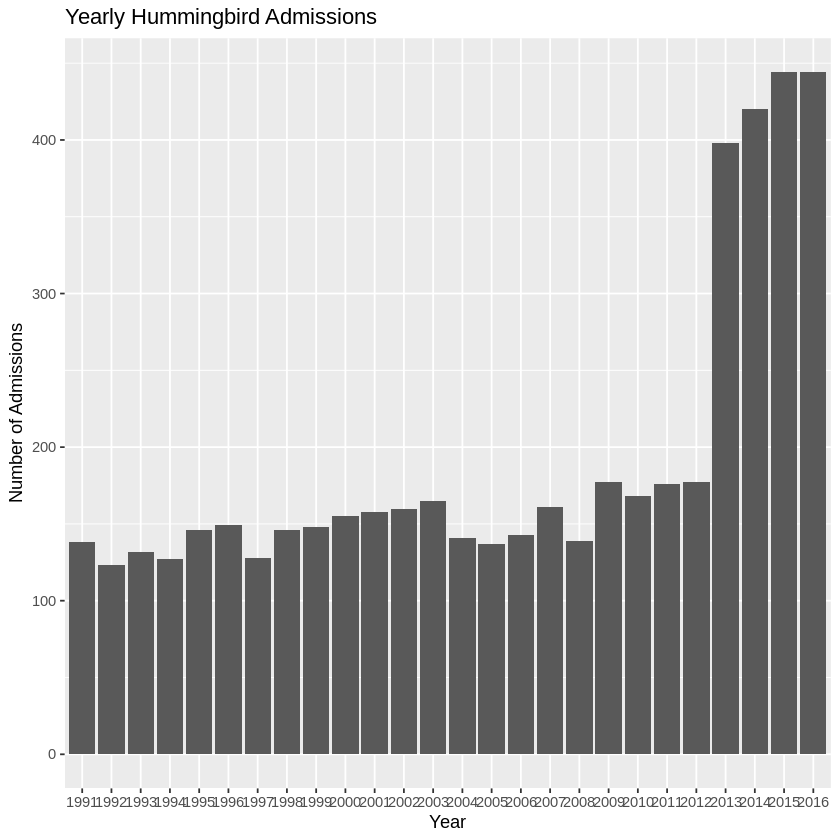

In [70]:
# Plot admissions by year
ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Year") +
  ylab("Number of Admissions") +
  labs(title = "Yearly Hummingbird Admissions")

# **Part 4: First Commit and Repository Setup**
Step 5: Edit and Commit Your README.md File
What is README.md? It’s a markdown file that provides a summary of your project.

Open the README.md file in your repository.

Write a 5-sentence summary about your first assignment on hummingbird data:

What does your code do?

What are the main features and functionalities?

What outputs does the code generate?

After editing, commit your changes:

Use a meaningful commit message, for example Initial commit with a project summary.

Standard practice dictates that your message should be meaningful for all collaborators but still short and precise.

My code imports the hummingbird dataset, checks its structure, and generates a cleaned subset of 5,000 observations for analysis. It identifies the number of rows, columns, and variable types (categorical vs. continuous) to understand the dataset's composition. The script uses dplyr to summarize key features such as rehabilitation centers and bird counts, and employs ggplot2 to visualize patterns. It also writes the processed subset to a new CSV file for future modeling. Overall, the code provides a complete workflow for loading, inspecting, sub-setting, summarizing, and exporting hummingbird data.

# **Part 5: Updating and Analyzing Code**
Open in Colab your code for Assignment4.ipynb.

Step 7: Modify Code for Visualization
Task: Update your code to create a timeline plot of monthly hummingbird admissions.

Differentiate between species groups using the Species group column.

Your plot should show admissions for two distinct species groups over time.



In [71]:
# Monthly admissions by month AND species group
admissions_by_month_species <- model_data %>%
  # make a proper Date for the first day of each month
  mutate(Admitted_month = as.Date(format(Admitted_date, "%Y-%m-01"))) %>%
  group_by(Admitted_month, Species_group) %>%   # group by time + species group
  summarise(count = n_distinct(ID), .groups = "drop")

admissions_by_month_species

Admitted_month,Species_group,count
<date>,<chr>,<int>
1991-01-01,Non-selasphorus,13
1991-02-01,Non-selasphorus,4
1991-03-01,Non-selasphorus,12
1991-03-01,Selasphorus,9
1991-04-01,Non-selasphorus,21
1991-04-01,Selasphorus,9
1991-05-01,Non-selasphorus,12
1991-05-01,Selasphorus,5
1991-06-01,Non-selasphorus,10


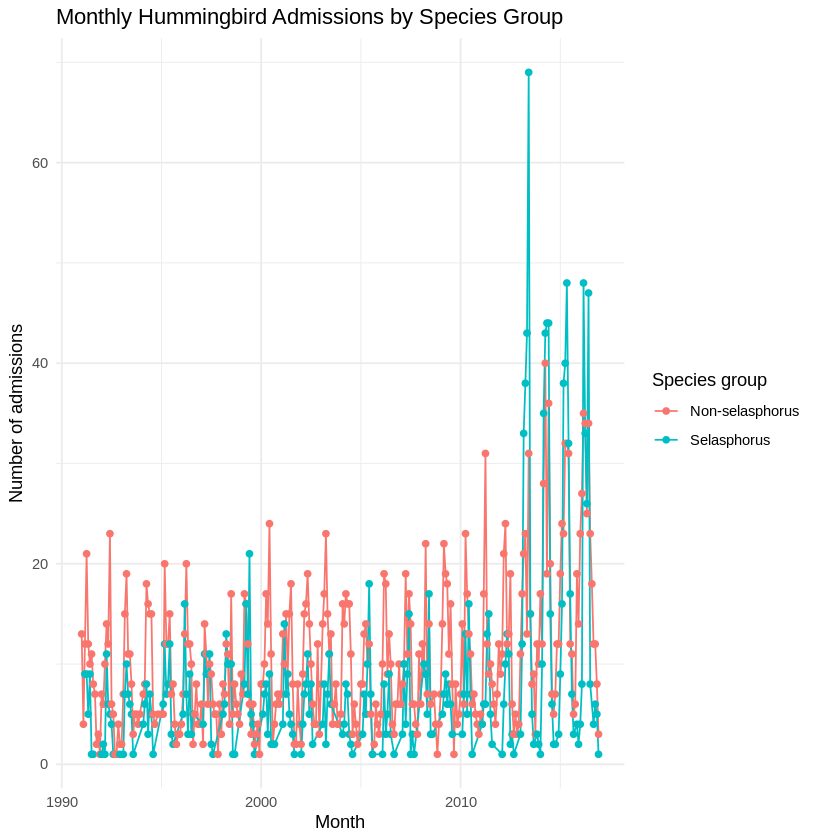

In [72]:
library(ggplot2)

ggplot(admissions_by_month_species,
       aes(x = Admitted_month,
           y = count,
           color = Species_group,
           group = Species_group)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Monthly Hummingbird Admissions by Species Group",
    x = "Month",
    y = "Number of admissions",
    color = "Species group"
  ) +
  theme_minimal()

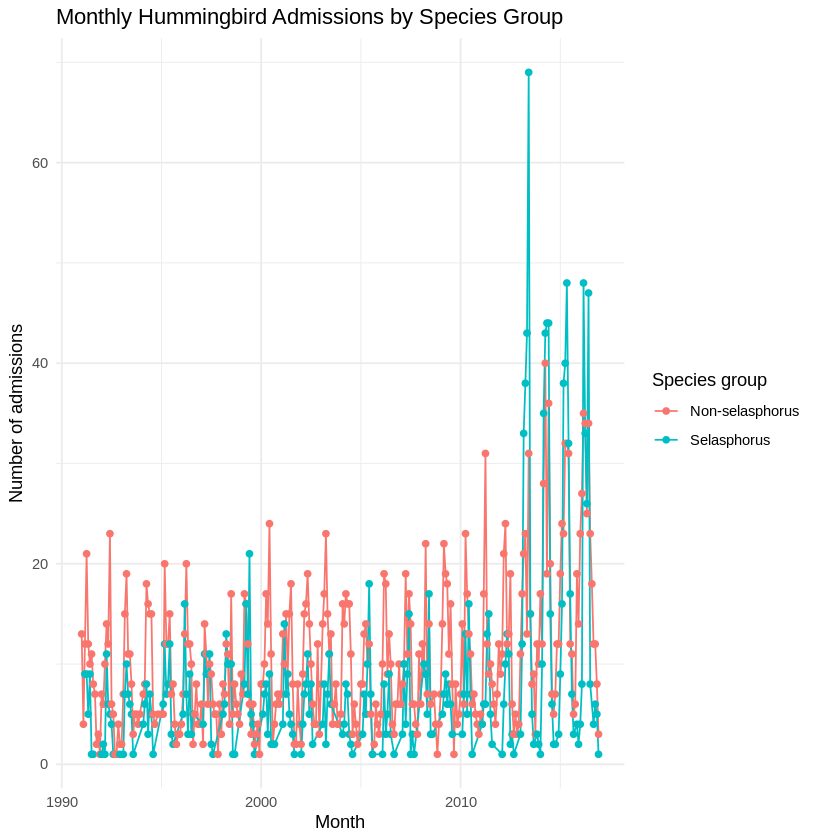

In [73]:
library(ggplot2)

ggplot(admissions_by_month_species,
       aes(x = Admitted_month,
           y = count,
           color = Species_group,
           group = Species_group)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Monthly Hummingbird Admissions by Species Group",
    x = "Month",
    y = "Number of admissions",
    color = "Species group"
  ) +
  theme_minimal()


Step 8: Pushing Your Changes to GitHub using Colab
After completing the code changes:

Commit and save your updated code directly on Github by clicking on File > Save a Copy in Github

Select your newly created MPM_200_Sharma repository

Select main branch

Edit the file path to appropriate folder:

/Code/name_of_your_file.ipynb
Commit message, example Added timeline plot of monthly admissions.

Refresh your repository on Github and review changes

Once you are done with the previous step, reach out to the instructor for updates on the code for this assignment.

# **Step 9: Pull Changes from Your Instructor**
Your instructor will push new code for Backward Selection Analysis to your repository.

Go to your code notebook, ensure that a new commit message has appeared
Why Check? This ensures your local version stays synchronized with the instructor's updates.

Open the code notebook, locate the new updates from the instructor by clicking on the Open in Colab button

Fix the code and run it to answer the questions in this assignment

Section 4: Running full model and model selection

In [85]:
# Full model
fullmodel = glm(Disposition_binary_factor ~ r + Green_Orange + season + F_Aid + Species_e,
                data = model_data,
                family = binomial(link = "logit"))
fullmodel


Call:  glm(formula = Disposition_binary_factor ~ r + Green_Orange + 
    season + F_Aid + Species_e, family = binomial(link = "logit"), 
    data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                     -2.0653                        0.1188  
        rfound on the ground                 rnest-related  
                      0.1190                        0.7112  
  rsuspect torpor-like state                      runknown  
                     -1.1540                        0.3974  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                     -0.1189                        0.2715  
                seasonSpring                  seasonSummer  
                      1.1813                        1.0666  
                seasonWinter                      F_AidYes  
                      0.7118                       -0.1000  
               Species_eBCHU      Species_eNon-selasphorus  
                      0.3071   

In [86]:
# Backward selection
backward_model = step(fullmodel,
                      k = 2,
                      direction = "backward",
                      test = "Chisq")

Start:  AIC=5891.02
Disposition_binary_factor ~ r + Green_Orange + season + F_Aid + 
    Species_e


Step:  AIC=5891.02
Disposition_binary_factor ~ r + season + F_Aid + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
<none>           5863.0 5891.0                      
- F_Aid      1   5865.2 5891.2   2.207    0.1374    
- r          6   5934.9 5950.9  71.917 1.652e-13 ***
- season     3   5946.2 5968.2  83.224 < 2.2e-16 ***
- Species_e  3   6061.1 6083.1 198.129 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [87]:
# Forward selection (using the same full model as starting point, per template)
forward_model = step(fullmodel,
                     k = 2,
                     direction = "forward",
                     test = "Chisq")

Start:  AIC=5891.02
Disposition_binary_factor ~ r + Green_Orange + season + F_Aid + 
    Species_e



In [88]:

names(backward_model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          
[31] "anova"

# **Part 7: Exploring and Interpreting the GLM Model**
Step 10: Explore Model Properties
Use this command to view the properties of the fitted model:

names(backward_model)
Q1: How many model properties are available?

There are 31 model properties available

In [89]:
backward_model$coefficients
backward_model$fitted.values
backward_model$residuals
backward_model$call
backward_model$aic
backward_model$anova

(Intercept)              rfound inside 
                -2.0652805                  0.1188001 
      rfound on the ground              rnest-related 
                 0.1189509                  0.7112170 
rsuspect torpor-like state                   runknown 
                -1.1539696                  0.3973770 
               rwindow hit               seasonSpring 
                -0.1189307                  1.1813262 
              seasonSummer               seasonWinter 
                 1.0665517                  0.7118308 
                  F_AidYes              Species_eBCHU 
                -0.1000187                  0.3070646 
  Species_eNon-selasphorus       Species_eSelasphorus 
                 1.2432061                  0.2714704

1          2          3          4          5          6          7 
0.59343504 0.43223065 0.32904611 0.29322380 0.20530696 0.42861313 0.29629116 
         8          9         10         11         12         13         14 
0.20841310 0.31756097 0.35149281 0.12495413 0.27627227 0.31756097 0.44642968 
        15         16         17         18         19         20         21 
0.32579664 0.11442189 0.29235903 0.26837458 0.59343504 0.29629116 0.38070019 
        22         23         24         25         26         27         28 
0.31756097 0.58987004 0.25805709 0.20841310 0.35244538 0.37906165 0.31756097 
        29         30         31         32         33         34         35 
0.29235903 0.29629116 0.31756097 0.47718800 0.32996880 0.22539500 0.32996880 
        36         37         38         39         40         41         42 
0.74468607 0.18658107 0.41826947 0.15870389 0.72520922 0.35582036 0.74468607 
        43         44         45         46         47         48         49 
0.11251746 0.29629116 0.17187465 0.35403447 0.29629116 0.31752828 0.24997465 
        50         51         52         53         54         55         56 
0.29322380 0.35149281 0.22539500 0.38070019 0.27293214 0.26919142 0.29235903 
        57         58         59         60         61         62         63 
0.70175638 0.72520922 0.11442189 0.20530696 0.53605198 0.35741627 0.39415018 
        64         65         66         67         68         69         70 
0.27293214 0.09511535 0.11251746 0.31756097 0.31756097 0.20530696 0.29322380 
        71         72         73         74         75         76         77 
0.29235903 0.31756097 0.22539500 0.31756097 0.35403447 0.74468607 0.24644567 
        78         79         80         81         82         83         84 
0.74468607 0.29322380 0.59343504 0.11527830 0.35741627 0.35244538 0.39415018 
        85         86         87         88         89         90         91 
0.37906165 0.38070019 0.35149281 0.72225891 0.29322380 0.43223065 0.61732338 
        92         93         94         95         96         97         98 
0.11251746 0.44642968 0.29629116 0.31756097 0.26919142 0.45692275 0.14940394 
        99        100        101        102        103        104        105 
0.37906165 0.12493764 0.72225891 0.72520922 0.38070019 0.10546333 0.61732338 
       106        107        108        109        110        111        112 
0.12495413 0.31756097 0.29319254 0.31756097 0.29235903 0.36061096 0.38443142 
       113        114        115        116        117        118        119 
0.44642968 0.39415018 0.35244538 0.12495413 0.29629116 0.37906165 0.61732338 
       120        121        122        123        124        125        126 
0.74468607 0.22539500 0.27293214 0.11442189 0.27293214 0.31756097 0.49598974 
       127        128        129        130        131        132        133 
0.61732338 0.38070019 0.12495413 0.56547424 0.31756097 0.29319254 0.29235903 
       134        135        136        137        138        139        140 
0.41826947 0.11251746 0.15870389 0.29629116 0.26919142 0.35582036 0.10291020 
       141        142        143        144        145        146        147 
0.37906165 0.10407933 0.31756097 0.29629116 0.45692275 0.18658107 0.11527830 
       148        149        150        151        152        153        154 
0.65849849 0.29322380 0.27293214 0.29629116 0.18658107 0.18658107 0.58987004 
       155        156        157        158        159        160        161 
0.29629116 0.35403447 0.35244538 0.27293214 0.24644567 0.29625972 0.29322380 
       162        163        164        165        166        167        168 
0.30334210 0.35582036 0.72225891 0.12493764 0.58987004 0.61732338 0.29322380 
       169        170        171        172        173        174        175 
0.29322380 0.27293214 0.35582036 0.61732338 0.18658107 0.24997465 0.31756097 
       176        177        178        179        180        181        182 
0.10291020 0.35403447 0.1865810

1         2         3         4         5         6         7         8 
 1.685104 -1.761279 -1.490415 -1.414875 -1.258347  2.333106 -1.421042 -1.263285 
        9        10        11        12        13        14        15        16 
-1.465332 -1.542003 -1.142797 -1.381735  3.149002  2.239994 -1.483232 -1.129206 
       17        18        19        20        21        22        23        24 
-1.413146 -1.366820 -2.459632 -1.421042  2.626739 -1.465332  1.695289 -1.347813 
       25        26        27        28        29        30        31        32 
-1.263285 -1.544271 -1.610466 -1.465332  3.420452  3.375058 -1.465332  2.095610 
       33        34        35        36        37        38        39        40 
 3.030590 -1.290981  3.030590 -3.916747 -1.229379 -1.719009 -1.188642  1.378912 
       41        42        43        44        45        46        47        48 
-1.552362  1.342848 -1.126783 -1.421042 -1.207547 -1.548070 -1.421042 -1.465262 
       49        50        51        52        53        54        55        56 
 4.000406 -1.414875  2.845008  4.436656 -1.614727 -1.375387 -1.368347 -1.413146 
       57        58        59        60        61        62        63        64 
 1.424996 -3.639132 -1.129206 -1.258347  1.865491  2.797858  2.537104 -1.375387 
       65        66        67        68        69        70        71        72 
-1.105113 -1.126783 -1.465332  3.149002 -1.258347  3.410364  3.420452 -1.465332 
       73        74        75        76        77        78        79        80 
-1.290981 -1.465332 -1.548070  1.342848 -1.327044  1.342848 -1.414875  1.685104 
       81        82        83        84        85        86        87        88 
 8.674659 -1.556217 -1.544271 -1.650574  2.638093  2.626739 -1.542003  1.384545 
       89        90        91        92        93        94        95        96 
-1.414875  2.313580  1.619897 -1.126783 -1.806455  3.375058 -1.465332  3.714829 
       97        98        99       100       101       102       103       104 
 2.188554 -1.175646 -1.610466 -1.142776 -3.600475 -3.639132  2.626739 -1.117897 
      105       106       107       108       109       110       111       112 
 1.619897 -1.142797  3.149002 -1.414812  3.149002 -1.413146 -1.563993  2.601244 
      113       114       115       116       117       118       119       120 
 2.239994 -1.650574 -1.544271 -1.142797  3.375058  2.638093  1.619897  1.342848 
      121       122       123       124       125       126       127       128 
 4.436656  3.663914 -1.129206 -1.375387  3.149002 -1.984087 -2.613172 -1.614727 
      129       130       131       132       133       134       135       136 
-1.142797  1.768427 -1.465332 -1.414812 -1.413146 -1.719009 -1.126783 -1.188642 
      137       138       139       140       141       142       143       144 
-1.421042 -1.368347 -1.552362  9.717209 -1.610466 -1.116170  3.149002  3.375058 
      145       146       147       148       149       150       151       152 
 2.188554 -1.229379 -1.130299 -2.928245 -1.414875  3.663914 -1.421042 -1.229379 
      153       154       155       156       157       158       159       160 
 5.359601  1.695289 -1.421042 -1.548070 -1.544271  3.663914 -1.327044 -1.420979 
      161       162       163       164       165       166       167       168 
-1.414875  3.296608 -1.552362  1.384545 -1.142776  1.695289  1.619897  3.410364 
      169       170       171       172       173       174       175       176 
 3.410364 -1.375387 -1.552362  1.619897 -1.229379 -1.333288 -1.465332 -1.114716 
      177       178       179       180       181       182       183       184 
-1.548070 -1.229379  2.638093 -1.081478 -1.729697 -3.352964  1.548278 -1.114716 
      185       186       187       188       189       190       191       192 
 2.390803  1.619897 -1.331906 -1.170938  4.798163  3.149002 -1.465332 -1.552362 
      193       194       195       196       197       198       199       200 
 8.739586  2.188554 -1.421042 -1.465332

glm(formula = Disposition_binary_factor ~ r + season + F_Aid + 
    Species_e, family = binomial(link = "logit"), data = model_data)

[1] 5891.017

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,4986,5863.017,5891.017
- Green_Orange,0,0,4986,5863.017,5891.017


In [92]:
library(sjPlot)

tab_model(backward_model)

In [93]:
summary(backward_model)


Call:
glm(formula = Disposition_binary_factor ~ r + season + F_Aid + 
    Species_e, family = binomial(link = "logit"), data = model_data)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -2.06528    0.16733 -12.343  < 2e-16 ***
rfound inside               0.11880    0.20520   0.579 0.562617    
rfound on the ground        0.11895    0.10497   1.133 0.257120    
rnest-related               0.71122    0.13307   5.344 9.07e-08 ***
rsuspect torpor-like state -1.15397    0.34648  -3.331 0.000867 ***
runknown                    0.39738    0.12048   3.298 0.000973 ***
rwindow hit                -0.11893    0.14366  -0.828 0.407734    
seasonSpring                1.18133    0.15492   7.626 2.43e-14 ***
seasonSummer                1.06655    0.15824   6.740 1.58e-11 ***
seasonWinter                0.71183    0.17064   4.172 3.02e-05 ***
F_AidYes                   -0.10002    0.06743  -1.483 0.137973    
Species_eBCHU               0

In [94]:
exp(coef(backward_model))

(Intercept)              rfound inside 
                 0.1267827                  1.1261447 
      rfound on the ground              rnest-related 
                 1.1263146                  2.0364682 
rsuspect torpor-like state                   runknown 
                 0.3153823                  1.4879167 
               rwindow hit               seasonSpring 
                 0.8878693                  3.2586930 
              seasonSummer               seasonWinter 
                 2.9053436                  2.0377184 
                  F_AidYes              Species_eBCHU 
                 0.9048205                  1.3594287 
  Species_eNon-selasphorus       Species_eSelasphorus 
                 3.4667103                  1.3118921

In [96]:
library(sjPlot)

tab_model(backward_model)

# **Step 11: Calculate Odds Ratios**
Calculate odds ratios manually or use this command for a summary:

library(sjPlot)

tab_model(backward_model)
If tab_model() doesn't work use summary(YOUR MODEL NAME HERE) Answer these questions:

Q2: Which variable has the highest odds ratio for survival?
   
   Birds in the Non-selasphorus species group are 3.5 times more likely to survive compared to the reference species.

Q3: Do the calculated odds ratios match the values provided by sjPlot?

   Yes. The manually calculated odds ratios match what sjPlot would show, because sjPlot uses the same formula:

# **Part 8: Final Push**
Step 11: Committing the new updated outputs
For submission of this assignment push the final code to your repository using instructions in Step 8

As usual, provide a meaningful commit message.

Note

Total Points: 30